In [4]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import time
from sklearn import metrics


#print(os.getcwd()) ->  C:\Users\prana\Desktop\receiptScraper

folder = os.getcwd()

#find file locations for each of the 4 csv's
clothing = os.path.join(folder,'clothing.csv')
entertainment = os.path.join(folder,'entertainment.csv')
food = os.path.join(folder,'food.csv')
homeOffice = os.path.join(folder,'homeOffice.csv')

#put the data from the 4 csv's into panda dataframes
clothing_df = pd.read_csv(clothing, header=None, names=['productTitle'])
entertainment_df = pd.read_csv(entertainment, header=None, names=['productTitle'])
food_df = pd.read_csv(food, header=None, names=['productTitle'])
homeOffice_df = pd.read_csv(homeOffice, header=None, names=['productTitle'])

#add a column of category label integers for the data in each of the 4 dataframes
#clothing = 1, entertainment = 2, food and drink = 3, home and office = 4
clothing_df['Category'] = 1
entertainment_df['Category'] = 2
food_df['Category'] = 3
homeOffice_df['Category'] = 4

frames = [clothing_df, entertainment_df, food_df, homeOffice_df]

dataset = pd.concat(frames)

#shuffled_data = dataset.sample(frac=1).reset_index(drop=True)

#print(shuffled_data.size) -> 398080
#print(clothing_df.size)   -> 85220
#print(entertainment_df.size)  -> 131586
#print(food_df.size)  -> 78846
#print(homeOffice_df.size) -> 102428

#print(dataset.head())

X_train, X_test, y_train, y_test = train_test_split(dataset['productTitle'], dataset['Category'], test_size= 0.2, random_state = 10)

X_train = X_train.values.astype('U')
X_test = X_test.values.astype('U')

#executes both Count Vectorizer and TFIDF Transformer in one line
tfidf_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')

X_train = tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)

t0= time.time() #to start timer on model training time

#using Linear Support Vector classifier
model = LinearSVC(random_state=0, tol=1e-4).fit(X_train, y_train)


test_results = model.predict(X_test.toarray())
accuracy = metrics.accuracy_score(y_test, test_results)


print("accuracy:   %0.4f" % accuracy)

t1 = time.time() - t0 #to calculate model training time
print(t1, " seconds")

#LinearSVC accuracy = 0.9818, model training time was 141.54 seconds

accuracy:   0.9818
20.80690097808838  seconds


In [5]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
filename2 = 'vectorizer.pk'
pickle.dump(tfidf_vect,open(filename2, 'wb'))

In [17]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_tfidfVect = pickle.load(open(filename2, 'rb'))
pred = loaded_model.predict(loaded_tfidfVect.transform(["Swiffer mop", "Plate"]))
#add a column of category label integers for the data in each of the 4 dataframes
#clothing = 1, entertainment = 2, food and drink = 3, home and office = 4
print(pred)

[4 4]


Confusion matrix, without normalization
[[ 8479    23     3    19]
 [   15 12920    65   172]
 [    2   155  7631    98]
 [    9   109    53 10055]]
Normalized confusion matrix
[[9.95e-01 2.70e-03 3.52e-04 2.23e-03]
 [1.14e-03 9.81e-01 4.93e-03 1.31e-02]
 [2.54e-04 1.97e-02 9.68e-01 1.24e-02]
 [8.80e-04 1.07e-02 5.18e-03 9.83e-01]]


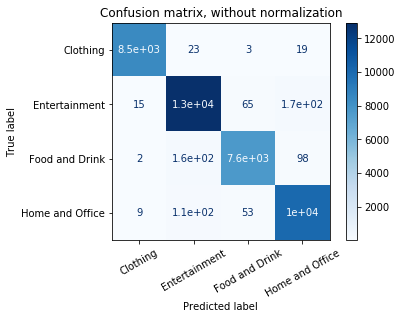

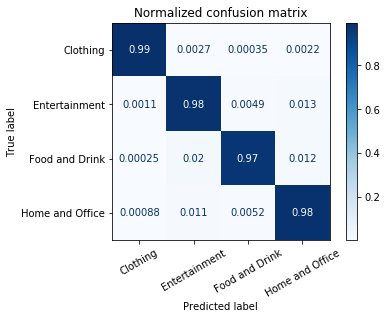

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)

class_names = ["Clothing", "Entertainment", "Food and Drink", "Home and Office"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(loaded_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                xticks_rotation=30 )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()